In [4]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv(r'C:\Users\AMIT\Desktop\MSIT_ML_CLASS-master-1\MSIT_ML_CLASS-master\datasets\boston_housing.csv')
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
clean_data=data[["RM","MEDV"]].values

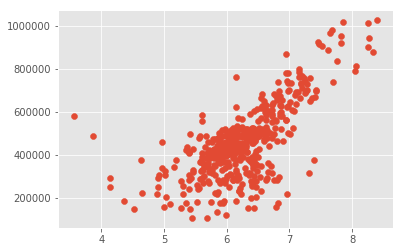

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.scatter(clean_data[:,0],clean_data[:,1])
plt.show()

In [8]:
def gradient_descent():
    m=1
    b=0
    learning_rate=0.01
    loss_list=[]
    N=int(len(clean_data))
    num_iterations=10000
    b_gradient=0
    m_gradient=0
    for i in range(num_iterations):
        for j in range(N):
            x=clean_data[j,0]
            y=clean_data[j,1]
        
            guess=m*x+b
            error=y-guess
        
            loss=(1/float(N))*error**2
            
            
            b_gradient=(2/N)*(error)
            m_gradient=(2/N)*(error*x)
        loss_list.append(loss)
        m=m+(m_gradient)*learning_rate
        b=b+(b_gradient)*learning_rate
        
    return(loss_list,m,b)   

loss,m,b=gradient_descent()
loss[-1]
        
       
        
        

6.6815754674178724e-06

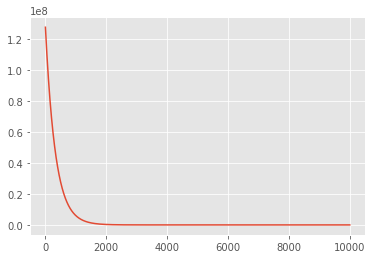

In [6]:
plt.plot(loss)

In [7]:
x=np.arange(1,10)
y=m*x+b
print(x)
print(y)

[1 2 3 4 5 6 7 8 9]
[ 47022.19616705  87355.74423069 127689.29229432 168022.84035795
 208356.38842159 248689.93648522 289023.48454885 329357.03261248
 369690.58067612]


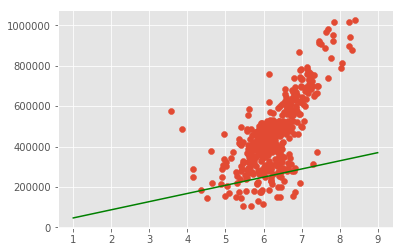

In [8]:
plt.scatter(clean_data[:,0],clean_data[:,1])
plt.plot(x,y,c='g')

In [11]:
def calculate_loss(m,b,clean_data):
    loss=0
    
    N=float(len(clean_data))
    for i in range(len(clean_data)):
        x=clean_data[i,0]
        y=clean_data[i,1]
        guess=m*x+b
        error=y-guess
        loss+=(1/N)*(error)**2
    return loss
    

In [12]:
def step_gradient(b,m,clean_data,learning_rate):
        
        b_gradient=0
        m_gradient=0
        N=int(len(clean_data))
    
        for i in range(0,len(clean_data)):
            x=clean_data[i,0]
            y=clean_data[i,1]
        
            guess=m*x+b
            error=(y-guess)
        
            m_gradient+=(2/N)*(error*x)
            b_gradient+=(2/N)*(error)
        b=b+(b_gradient)*learning_rate
        m=m+(m_gradient)*learning_rate
    
        return[b,m]

In [13]:
learning_rate=0.01
b=0
m=0
num_iterations=10000

first_loss=calculate_loss(m,b,clean_data)

loss_list=[]
for i in range(num_iterations):
    
    b,m=step_gradient(b,m,clean_data,learning_rate)
    loss_list.append(calculate_loss(m,b,clean_data))
loss_list
loss_list[-1]


14099244123.349499

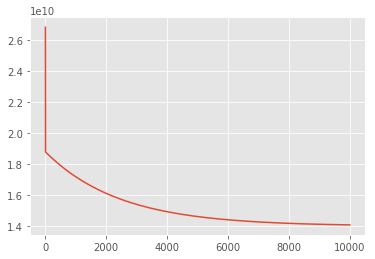

In [62]:

plt.plot(loss_list)


In [63]:
x=np.arange(1,10)
y=m*x+b
print(x)
print(y)

[1 2 3 4 5 6 7 8 9]
[-411084.18480464 -245765.52193935  -80446.85907405   84871.80379124
  250190.46665653  415509.12952182  580827.79238711  746146.4552524
  911465.11811769]


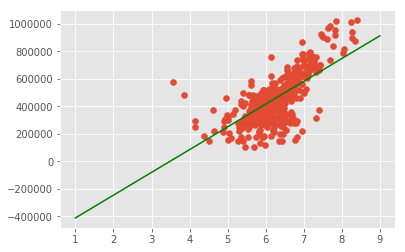

In [64]:
plt.scatter(clean_data[:,0],clean_data[:,1])
plt.plot(x,y,c='g')

## how good is your model?

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(clean_data[:,0],clean_data[:,1],test_size=0.3,random_state=24)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(342,)
(147,)
(342,)
(147,)


In [15]:
clean_data=np.zeros((X_train.shape[0],2))
clean_data[:,0]=X_train
clean_data[:,1]=y_train

learning_rate=0.01
b=0
m=0
num_iterations=10000

first_loss=calculate_loss(m,b,clean_data)

loss_list=[]
for i in range(num_iterations):
    
    b,m=step_gradient(b,m,clean_data,learning_rate)
    loss_list.append(calculate_loss(m,b,clean_data))
loss_list
loss_list[-1]


14357577604.66361

In [25]:
#predict

points_test=np.zeros((X_test.shape[0],2))# at starting all elements are zero
print(X_test.shape)
print(X_test.shape[0])

points_test[:,0]=X_test# now all  elements are  not zero
points_test[:,1]=y_test
# data and target all are complete               
predictions=[]

for i in points_test:
    y_predicted=m*points_test[:,0]+b
    predictions.append(y_predicted)
    
print(predictions)



(147,)
147
[array([535554.04228501, 472372.86211293, 437719.9189063 , 448196.39010831,
       118268.13548524, 383403.44513592, 429983.44786483, 478981.09779419,
       455449.33170969, 506219.9229194 , 517985.80596165, 371476.38561364,
       579232.86837336, 572624.63269209, 485589.33347545, 427888.15362442,
       487684.62771586, 492197.56915672, 436752.86002612, 547319.92532725,
       501062.27555841, 511055.21732032, 509121.09955995, 410319.91730107,
       440459.91906683, 539261.10132571, 487039.92179573, 497355.2165177 ,
       483494.03923505, 488651.68659604, 420312.85906298, 647249.34294636,
       580683.45669363, 428694.03602458, 408063.44658064, 413865.79986174,
       560052.86724969, 518146.98244168, 179676.37437698, 416766.9765023 ,
       379535.20961518, 343592.85456831, 374377.5622542 , 394202.26929799,
       527011.68884337, 245275.20174952, 441265.80146698, 717038.7587997 ,
       394363.44577802, 478981.09779419, 690122.28663455, 479625.80371431,
       410642

## how to score

In [26]:
predictions-y_test

array([[-41945.95771499,  92272.86211293,   5119.9189063 , ...,
        -28754.19580411, -96682.42474338, 148778.7453157 ],
       [-41945.95771499,  92272.86211293,   5119.9189063 , ...,
        -28754.19580411, -96682.42474338, 148778.7453157 ],
       [-41945.95771499,  92272.86211293,   5119.9189063 , ...,
        -28754.19580411, -96682.42474338, 148778.7453157 ],
       ...,
       [-41945.95771499,  92272.86211293,   5119.9189063 , ...,
        -28754.19580411, -96682.42474338, 148778.7453157 ],
       [-41945.95771499,  92272.86211293,   5119.9189063 , ...,
        -28754.19580411, -96682.42474338, 148778.7453157 ],
       [-41945.95771499,  92272.86211293,   5119.9189063 , ...,
        -28754.19580411, -96682.42474338, 148778.7453157 ]])

In [29]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
lr.predict(X_test.reshape(-1,1))
r2=lr.score(X_test.reshape(-1,1),y_test.reshape(-1,1))
print(r2)

print(X_train.reshape(-1,1))

0.5221738820372132
[[6.249]
 [6.372]
 [5.96 ]
 [6.144]
 [8.069]
 [7.163]
 [7.178]
 [6.129]
 [5.981]
 [5.928]
 [6.096]
 [6.951]
 [5.961]
 [5.813]
 [5.693]
 [6.03 ]
 [6.326]
 [6.152]
 [6.101]
 [6.726]
 [6.29 ]
 [5.887]
 [6.254]
 [5.905]
 [5.56 ]
 [6.03 ]
 [5.986]
 [5.852]
 [6.019]
 [6.066]
 [5.186]
 [6.474]
 [5.879]
 [6.63 ]
 [5.888]
 [6.696]
 [6.226]
 [5.627]
 [5.277]
 [5.985]
 [5.593]
 [6.037]
 [5.807]
 [6.416]
 [5.67 ]
 [6.459]
 [5.856]
 [5.813]
 [6.951]
 [5.628]
 [5.935]
 [5.713]
 [7.267]
 [6.232]
 [6.739]
 [6.004]
 [5.951]
 [6.375]
 [8.04 ]
 [6.849]
 [5.949]
 [6.727]
 [6.301]
 [6.122]
 [6.151]
 [5.868]
 [5.453]
 [5.926]
 [6.297]
 [5.362]
 [6.718]
 [7.454]
 [6.405]
 [6.083]
 [6.812]
 [5.713]
 [6.316]
 [6.411]
 [6.824]
 [5.818]
 [6.635]
 [6.485]
 [6.567]
 [7.333]
 [5.987]
 [5.857]
 [5.019]
 [6.649]
 [6.092]
 [6.193]
 [6.549]
 [5.304]
 [6.556]
 [6.229]
 [6.762]
 [6.565]
 [6.495]
 [5.682]
 [6.431]
 [6.127]
 [6.242]
 [5.093]
 [6.579]
 [6.442]
 [5.454]
 [7.765]
 [5.52 ]
 [3.863]
 [6.223]


In [30]:
print(lr.coef_)
print(lr.intercept_)

[[174195.44363561]]
[-630823.01221526]


In [35]:
X=data[["RM","LSTAT","PTRATIO"]].values
y=data["MEDV"].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

lr=LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
print(lr.score(X_test,y_test))
print(lr.coef_)
print(lr.intercept_)

0.6315493425383231
[ 80542.70502707 -12074.89153223 -19153.5225713 ]
465488.93762001826


#### NOTE: x is our data and y is our target and every data  has target
so X_train is data
y_train is target
X_test is data
y_test is target

In [41]:
prediction=[]
for x in X:
    predicted_values=m*x[0]+b
    prediction.append(predicted_values)
    
print(prediction)

#note: array is a combination of list and 1D array is equal to list

[511055.21732032276, 486234.0393955781, 609372.8701391167, 579232.8683733554, 603248.163897946, 487684.6277158554, 420312.8590629769, 446101.09586790646, 358904.6201712383, 419023.44722273026, 479142.27427422255, 419829.3296228843, 400488.1520191871, 410158.7408210358, 433851.68338556483, 391623.44561749266, 407902.2701006044, 416766.9765022991, 330698.7361658466, 374377.56225419603, 349072.85488935886, 412737.56450152874, 441265.80146698223, 388238.7395368456, 406129.3288202655, 353746.97281025234, 388238.7395368456, 425954.0358640553, 498161.098917858, 527011.688843373, 372121.0915337645, 429983.4478648255, 410319.9173010667, 370186.97377339506, 433851.68338556483, 407579.9171405429, 392751.6809777084, 394202.2692979856, 412898.7409815596, 514278.74692093907, 583423.4568541565, 542484.6309263306, 445617.56642781396, 452386.9785891081, 429499.918424733, 367124.6206528096, 383886.97457601386, 423214.03570353147, 321511.6768040904, 354230.50225034484, 412415.211541467, 436914.0365061502